# Project 1 – Decision Trees and Random Forests

In [111]:
# Reload all modules without having to restart the kernel
# Useful for development if you have edited any of the external code files.
%load_ext autoreload
%autoreload 2

# Imports
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold
from itertools import product
from sklearn.metrics import mean_squared_error, accuracy_score
import matplotlib.pyplot as plt
# ... add more imports as needed

# My implementations
from decision_tree import DecisionTree
from random_forest import RandomForest

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Dataset

Do data loading, exploration and preprocessing as you see fit.

Here is some code to load the dataset to get you started.

In [118]:
data = np.genfromtxt("wine_dataset_small.csv", delimiter=",", dtype=float, names=True)

feature_names = list(data.dtype.names[:-1])
target_name = data.dtype.names[-1]

X = np.array([data[feature] for feature in feature_names]).T
y = data[target_name].astype(int)

print(f"Feature columns names: {feature_names}")
print(f"Target column name: {target_name}")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

Feature columns names: ['citric_acid', 'residual_sugar', 'pH', 'sulphates', 'alcohol']
Target column name: type
X shape: (500, 5)
y shape: (500,)


Plotting histogram on the labels to see the distribution, to help deciding what performance metric to choose

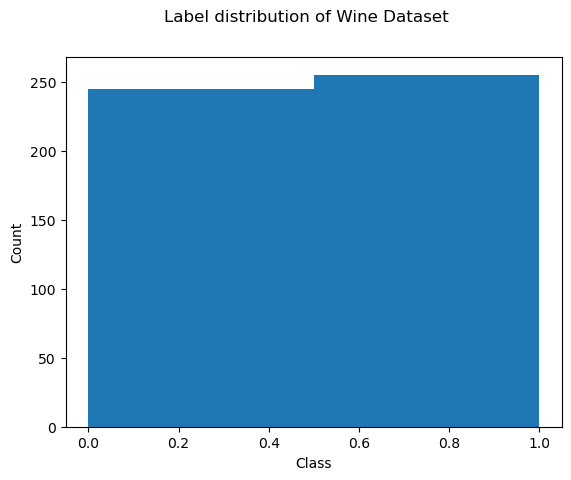

In [113]:
fig, ax = plt.subplots()
ax.hist(y, bins=2)
ax.set_xlabel('Class')
ax.set_ylabel('Count')
plt.suptitle("Label distribution of Wine Dataset")
plt.show()

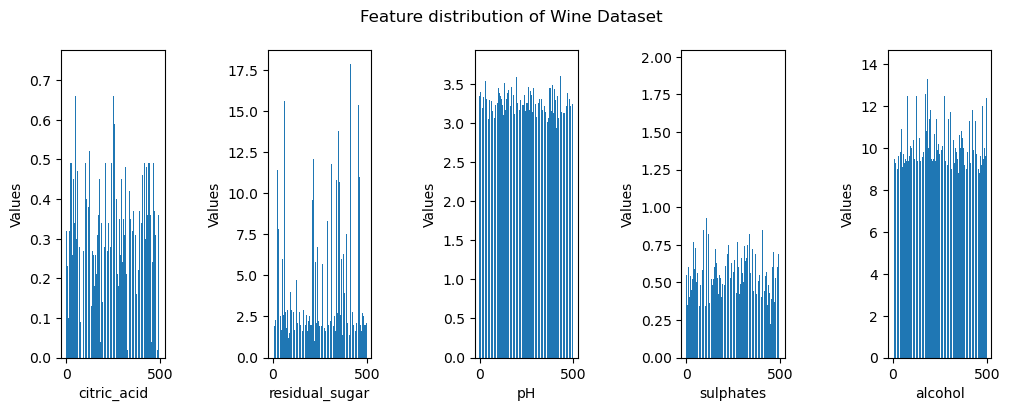

In [114]:
#Visualizing feature distribution


fig, axs = plt.subplots(ncols = X.shape[1], nrows=1, figsize=(12,4))

for i in range(X.shape[1]):
    axs[i].set_xlabel(f"{feature_names[i]}")
    axs[i].set_ylabel(f"Values")
    axs[i].bar(range(len(X[:, i])), X[:, i])

plt.subplots_adjust(wspace=1.0)
plt.suptitle("Feature distribution of Wine Dataset")
plt.show()



# Model Selection

K-fold cross-validation

In [119]:
seed = 42
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, shuffle=False, random_state=seed)

k = 5
kf = KFold(k, shuffle=True, random_state=seed)

### Decision tree

In [116]:
max_depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

validation_scores = []

for max_depth in max_depths:
    cv_scores = []
    for train_idxs, val_idxs in kf.split(X_train):
        X_train_fold, X_val_fold = X_train[train_idxs], X_train[val_idxs]
        y_train_fold, y_val_fold = y_train[train_idxs], y_train[val_idxs]

        model = DecisionTree(max_depth= max_depth, random_state=seed)
        model.fit(X_train_fold, y_train_fold)

        y_val_pred = model.predict(X_val_fold)
        cv_score = accuracy_score(y_val_fold, y_val_pred)
        cv_scores.append(cv_score)
    
    validation_score = np.mean(cv_scores)
    validation_scores.append(validation_score)

best_idx = np.argmax(validation_scores)
best_max_depth = max_depths[best_idx]
print(f"Best max_depth: {best_max_depth}")
print(f"The best accuracy: {validation_scores[best_idx]:.4f} was achieved when max_depth was {best_max_depth}")

Best max_depth: 6
The best accuracy: 0.8225 was achieved when max_depth was 6


Fit the best model on the training set and evaluate it on the test set

In [117]:
final_model = DecisionTree(max_depth=best_max_depth, random_state=seed)
final_model.fit(X_train, y_train)

y_train_pred = final_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Train accuracy: {train_accuracy:.4f}")

y_test_pred = final_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")


Train accuracy: 0.8825
Test Accuracy: 0.8100


### Random Forest

In [120]:
max_depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
n_estimators = [100, 200, 300, 400, 500]

hyper_parameters = list(product(max_depths, n_estimators))

validation_scores = []

for max_depth, n_estimators in hyper_parameters:
    cv_scores = []
    for train_idxs, val_idxs in kf.split(X_train):
        X_train_fold, X_val_fold = X_train[train_idxs], X_train[val_idxs]
        y_train_fold, y_val_fold = y_train[train_idxs], y_train[val_idxs]

        model = RandomForest(n_estimators=n_estimators, max_depth=max_depth, criterion="entropy", max_features="sqrt", random_state=seed)
        model.fit(X_train_fold, y_train_fold)

        y_val_pred = model.predict(X_val_fold)
        cv_score = accuracy_score(y_val_fold, y_val_pred)
        cv_scores.append(cv_score)
    
    validation_score = np.mean(cv_scores)
    validation_scores.append(validation_score)

best_idx = np.argmax(validation_scores)
best_max_depth,best_n_estimators = hyper_parameters[best_idx]
print(f"Best max_depth: {best_max_depth}")
print(f"Best n_estimators: {best_n_estimators}")
print(f"The best accuracy: {validation_scores[best_idx]:.4f} was achieved when max_depth was {best_max_depth} and the number of estimators was {best_n_estimators}")

Best max_depth: 10
Best n_estimators: 300
The best accuracy: 0.8725 was achieved when max_depth was 10 and the number of estimators was 300


Fit the best model on the training set and evaluate it on the test set

In [121]:
final_model = RandomForest(n_estimators=best_n_estimators, max_depth=best_max_depth, criterion="entropy",
max_features="sqrt", random_state=seed)
final_model.fit(X_train, y_train)

y_train_pred = final_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Train accuracy: {train_accuracy:.4f}")

y_test_pred = final_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

Train accuracy: 1.0000
Test Accuracy: 0.8800


## Model selection of existing implementation of DecisionTree

DecisionTreeClassifier from sklearn:

In [67]:
max_depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

validation_scores = []

for max_depth in max_depths:
    cv_scores = []
    for train_idxs, val_idxs in kf.split(X_train):
        X_train_fold, X_val_fold = X_train[train_idxs], X_train[val_idxs]
        y_train_fold, y_val_fold = y_train[train_idxs], y_train[val_idxs]

        model = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth, random_state=seed)
        model.fit(X_train_fold, y_train_fold)

        y_val_pred = model.predict(X_val_fold)
        cv_score = accuracy_score(y_val_fold, y_val_pred)
        cv_scores.append(cv_score)
    
    validation_score = np.mean(cv_scores)
    validation_scores.append(validation_score)

best_idx = np.argmax(validation_scores)
best_max_depth = max_depths[best_idx]
print(f"Best max_depth: {best_max_depth}")
print(f"The best accuracy: {validation_scores[best_idx]:.4f} was achieved when max_depth was {best_max_depth}")

Best max_depth: 4
The best accuracy: 0.8275 was achieved when max_depth was 4


Fit the best model on the training set and evaluate it on the test set

In [68]:
final_model = DecisionTreeClassifier(criterion="entropy", max_depth=best_max_depth, random_state=seed)
final_model.fit(X_train, y_train)

y_train_pred = final_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Train accuracy: {train_accuracy:.4f}")

y_test_pred = final_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

Train accuracy: 0.8750
Test Accuracy: 0.8200


## Model selection of existing implementation of RandomForestClassifier

RandomForestClassifier from sklearn:

In [69]:
max_depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
n_estimators = [100, 200, 300, 400, 500]

hyper_parameters = list(product(max_depths, n_estimators))

validation_scores = []

for max_depth, n_estimators in hyper_parameters:
    cv_scores = []
    for train_idxs, val_idxs in kf.split(X_train):
        X_train_fold, X_val_fold = X_train[train_idxs], X_train[val_idxs]
        y_train_fold, y_val_fold = y_train[train_idxs], y_train[val_idxs]

        model = RandomForestClassifier(n_estimators=n_estimators, criterion="entropy", max_depth=max_depth, max_features="sqrt", random_state=seed)
        model.fit(X_train_fold, y_train_fold)

        y_val_pred = model.predict(X_val_fold)
        cv_score = accuracy_score(y_val_fold, y_val_pred)
        cv_scores.append(cv_score)
    
    validation_score = np.mean(cv_scores)
    validation_scores.append(validation_score)

best_idx = np.argmax(validation_scores)
best_max_depth,best_n_estimators = hyper_parameters[best_idx]
print(f"Best max_depth: {best_max_depth}")
print(f"Best n_estimators: {best_n_estimators}")
print(f"The best accuracy: {validation_scores[best_idx]:.4f} was achieved when max_depth was {best_max_depth} and the number of estimators was {best_n_estimators}")

Best max_depth: 6
Best n_estimators: 200
The best accuracy: 0.8900 was achieved when max_depth was 6 and the number of estimators was 200


Fit the best model on the training set and evaluate it on the test set

In [70]:
final_model = RandomForestClassifier(n_estimators=best_n_estimators, criterion="entropy", max_depth=best_max_depth, max_features="sqrt", random_state=seed)
final_model.fit(X_train, y_train)

y_train_pred = final_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Train accuracy: {train_accuracy:.4f}")

y_test_pred = final_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

Train accuracy: 0.9550
Test Accuracy: 0.8700


TODO -> Result, comparision between custom implementations and existing implementations

Testing my implementations on the coffee dataset

In [71]:
data = np.genfromtxt("coffee_data.csv", delimiter=",", dtype=float, names=True)

feature_names = list(data.dtype.names[:-1])
target_name = data.dtype.names[-1]

X = np.array([data[feature] for feature in feature_names]).T
y = data[target_name].astype(int)

print(f"Feature columns names: {feature_names}")
print(f"Target column name: {target_name}")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

Feature columns names: ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Sweetness']
Target column name: CountryofOrigin
X shape: (419, 8)
y shape: (419,)


Plotting histogram on the labels to see the distribution, to help deciding what performance metric to choose

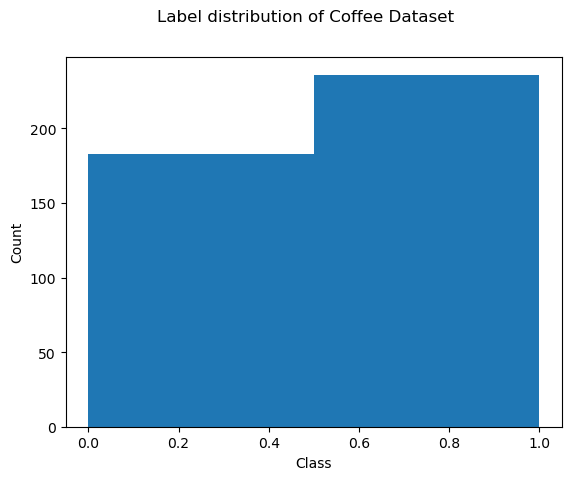

In [72]:
fig, ax = plt.subplots()
ax.hist(y, bins=2)
ax.set_xlabel('Class')
ax.set_ylabel('Count')
plt.suptitle("Label distribution of Coffee Dataset")
plt.show()

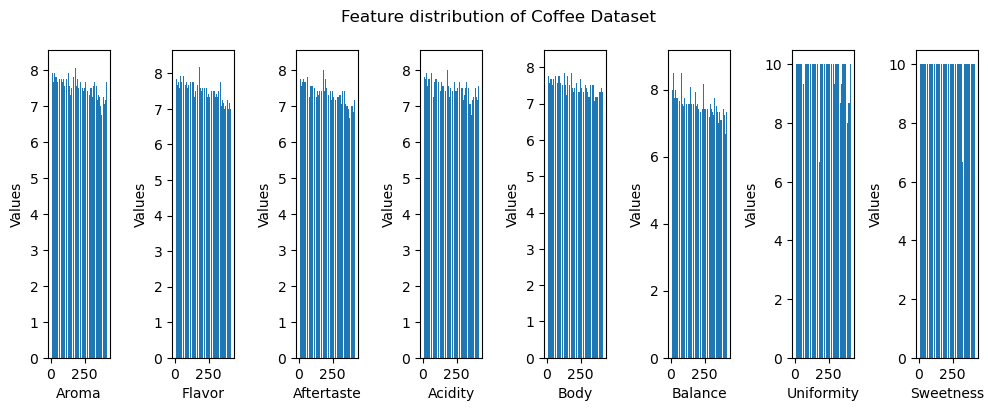

In [73]:
#Visualizing feature distribution


fig, axs = plt.subplots(ncols = X.shape[1], nrows=1, figsize=(12,4))

for i in range(X.shape[1]):
    axs[i].set_xlabel(f"{feature_names[i]}")
    axs[i].set_ylabel(f"Values")
    axs[i].bar(range(len(X[:, i])), X[:, i])

plt.subplots_adjust(wspace=1.0)
plt.suptitle("Feature distribution of Coffee Dataset")
plt.show()

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, shuffle=False, random_state=seed)

k = 5
kf = KFold(k, shuffle=True, random_state=seed)

Testing my decison tree implementation on coffee dataset.

In [75]:
max_depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

validation_scores = []

for max_depth in max_depths:
    cv_scores = []
    for train_idxs, val_idxs in kf.split(X_train):
        X_train_fold, X_val_fold = X_train[train_idxs], X_train[val_idxs]
        y_train_fold, y_val_fold = y_train[train_idxs], y_train[val_idxs]

        model = DecisionTree(max_depth= max_depth, random_state=seed)
        model.fit(X_train_fold, y_train_fold)

        y_val_pred = model.predict(X_val_fold)
        cv_score = accuracy_score(y_val_fold, y_val_pred)
        cv_scores.append(cv_score)
    
    validation_score = np.mean(cv_scores)
    validation_scores.append(validation_score)

best_idx = np.argmax(validation_scores)
best_max_depth = max_depths[best_idx]
print(f"Best max_depth: {best_max_depth}")
print(f"The best accuracy: {validation_scores[best_idx]:.4f} was achieved when max_depth was {best_max_depth}")

Best max_depth: 4
The best accuracy: 0.7493 was achieved when max_depth was 4


Fit the best model on the training set and evaluate it on the test set

In [76]:
final_model = DecisionTree(max_depth=best_max_depth, random_state=seed)
final_model.fit(X_train, y_train)

y_train_pred = final_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Train accuracy: {train_accuracy:.4f}")

y_test_pred = final_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

Train accuracy: 0.7940
Test Accuracy: 0.9405


Testing my random forest implementation on coffee dataset.

In [77]:
max_depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
n_estimators = [100, 200, 300, 400, 500]

hyper_parameters = list(product(max_depths, n_estimators))

validation_scores = []

for max_depth, n_estimators in hyper_parameters:
    cv_scores = []
    for train_idxs, val_idxs in kf.split(X_train):
        X_train_fold, X_val_fold = X_train[train_idxs], X_train[val_idxs]
        y_train_fold, y_val_fold = y_train[train_idxs], y_train[val_idxs]

        model = RandomForest(n_estimators=n_estimators, max_depth=max_depth, criterion="entropy", max_features="sqrt", random_state=seed)
        model.fit(X_train_fold, y_train_fold)

        y_val_pred = model.predict(X_val_fold)
        cv_score = accuracy_score(y_val_fold, y_val_pred)
        cv_scores.append(cv_score)
    
    validation_score = np.mean(cv_scores)
    validation_scores.append(validation_score)

best_idx = np.argmax(validation_scores)
best_max_depth,best_n_estimators = hyper_parameters[best_idx]
print(f"Best max_depth: {best_max_depth}")
print(f"Best n_estimators: {best_n_estimators}")
print(f"The best accuracy: {validation_scores[best_idx]:.4f} was achieved when max_depth was {best_max_depth} and the number of estimators was {best_n_estimators}")

Best max_depth: 8
Best n_estimators: 100
The best accuracy: 0.7731 was achieved when max_depth was 8 and the number of estimators was 100


Fit the best model on the training set and evaluate it on the test set

In [78]:
final_model = RandomForest(n_estimators=best_n_estimators, max_depth=best_max_depth, criterion="entropy",
max_features="sqrt", random_state=seed)
final_model.fit(X_train, y_train)

y_train_pred = final_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Train accuracy: {train_accuracy:.4f}")

y_test_pred = final_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

Train accuracy: 0.9045
Test Accuracy: 0.9286
